# Análise Preditiva das Tendências de Imigração do Brasil para o Canadá
#### Autor: Alleon Lima

#### Descrição 
* Este projeto desenvolvido em **Python** 3.12 explora e analisa as tendências de imigração do Brasil para o Canadá em um determinado período, aplicando técnicas de análise de dados e algoritmos de Machine Learning para entender e tentar prever o crescimento futuro.
#### Bibliotecas Utilizadas
- **Pandas**: manipulação de dados e estruturação do DataFrame.
- **Matplotlib** e **Seaborn**: visualização gráfica.
- **Deep_translator**: traduzir idioma.
- **Numpy**: operações matemáticas e transformação de arrays.
- **Scikit-learn**: construção e treinamento de um modelo de Machine Learning.
- **ARIMA**: previsão de séries temporais
#### Recursos utilizados no desenvolvimento
- **Jupyter Notebook**
- **Python** 3.12.3
- **immegration_to_canada.csv**

In [ ]:
#Importações:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

In [ ]:
#Entendimento dos dados:
df_imigracao = pd.read_csv('immigration_to_canada.csv')
df_imigracao.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
#Tratamentos necessários:
df_imigracao_crted = df_imigracao.drop('DevName', axis=1)
df_imigracao_crted.rename(columns={'Country': 'Pais'}, inplace=True)
df_imigracao_crted['Pais'] = df_imigracao_crted['Pais'].replace({'Bolivia (Plurinational State of)': 'Bolivia',
'Venezuela (Bolivarian Republic of)': 'Venezuela',
'United Kingdom of Great Britain and Northern Ireland' : 'United Kingdom and Northern Ireland',
'United States of America': 'United States',
'Iran (Islamic Republic of)': 'Iran',
'Republic of Korea': 'Korea'})

df_imigracao_crted.head()

,Pais,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [ ]:
#Informações do dataframe:
df_imigracao_crted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pais       195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   1980       195 non-null    int64 
 4   1981       195 non-null    int64 
 5   1982       195 non-null    int64 
 6   1983       195 non-null    int64 
 7   1984       195 non-null    int64 
 8   1985       195 non-null    int64 
 9   1986       195 non-null    int64 
 10  1987       195 non-null    int64 
 11  1988       195 non-null    int64 
 12  1989       195 non-null    int64 
 13  1990       195 non-null    int64 
 14  1991       195 non-null    int64 
 15  1992       195 non-null    int64 
 16  1993       195 non-null    int64 
 17  1994       195 non-null    int64 
 18  1995       195 non-null    int64 
 19  1996       195 non-null    int64 
 20  1997       195 non-null    int64

## Analisando as tendências de imigração do Brasil

In [ ]:
#Selecionando somente o país Brasil:
brasil_query = df_imigracao_crted.query('Pais=="Brazil"')
brasil_query

,Pais,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
24,Brazil,Latin America and the Caribbean,South America,211,220,192,139,145,130,205,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659


In [ ]:
#Tornando a coluna País um indexador para facilitar a busca/análise:
df_imigracao_crted.set_index('Pais', inplace= True)
df_imigracao_crted.head(3)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [ ]:
#Criando variável para armazenar o intervalo de tempo:
anos = list(map(str, range(1980, 2014)))

#Localizando somente o Brasil e o intervalo de anos:
brasil = df_imigracao_crted.loc['Brazil', anos]
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brazil, dtype: object

In [ ]:
#Cria dicionário para dar nome as colunas:
brasil_dic = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dic)

#Tornando ano um valor numérico:
dados_brasil['ano'] = pd.to_numeric(dados_brasil['ano'], errors= 'coerce')

dados_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


# Este gráfico mostra o fluxo de imigrantes Brasileiros para o Canadá com ascensão e pico em 2010
### **Pico de Imigração do Brasil para o Canadá em 2010**

Em 2010, o Brasil registrou seu maior número de imigrantes no Canadá, totalizando **2.598** novos residentes. Este aumento significativo no fluxo migratório pode ser atribuído a diversos fatores, como melhorias nas condições econômicas, oportunidades de trabalho e educação, além da busca por uma melhor qualidade de vida.

A crescente comunidade brasileira no Canadá reflete a diversidade cultural do país e o desejo de muitos brasileiros de explorar novas oportunidades fora de suas fronteiras. A análise deste pico de imigração é fundamental para entender as dinâmicas sociais e econômicas que influenciam as decisões de migração, bem como as consequências dessas escolhas tanto para os imigrantes quanto para o país anfitrião.


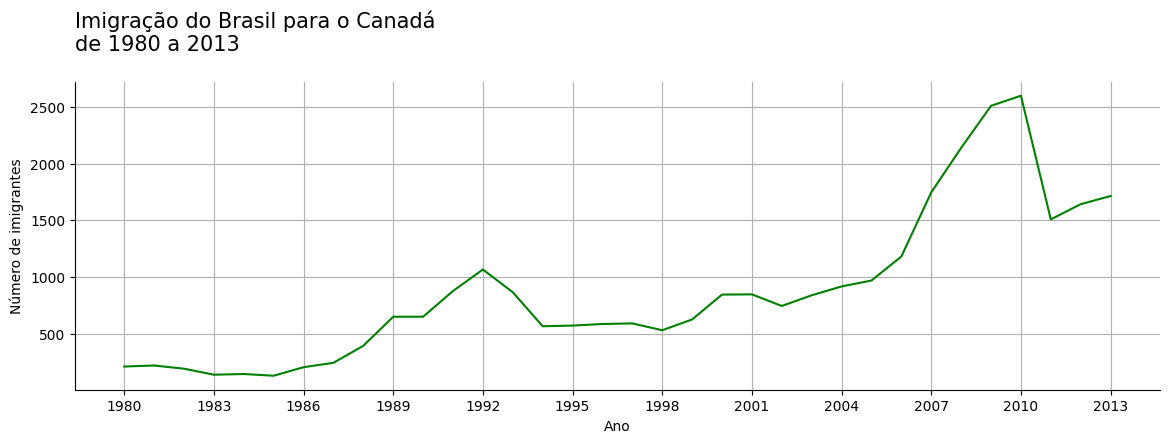

In [ ]:
#Gerando visualização:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], color= 'g')
plt.title('Imigração do Brasil para o Canadá\nde 1980 a 2013\n',fontsize= 15, loc= 'left')
ax.xaxis.set_major_locator(plt.MultipleLocator(3))
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid()
plt.show()

### **Crescimento Percentual da Imigração do Brasil para o Canadá (1980–2013)**

Entre 1980 e 2013, o Brasil experimentou um impressionante crescimento percentual no número de imigrantes para o Canadá, alcançando um aumento de **712%**.


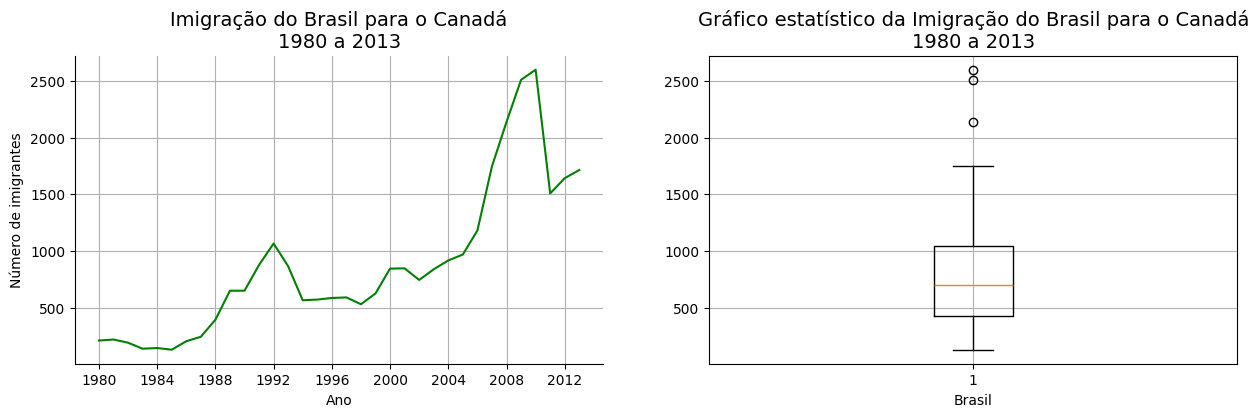

In [ ]:
#Visualização com Boxplot:
fig, axs = plt.subplots(1, 2, figsize= (15, 4))
axs[0].plot(dados_brasil['ano'],dados_brasil['imigrantes'], color= 'g')
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize= 14)
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(4))
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].grid()

axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Gráfico estatístico da Imigração do Brasil para o Canadá\n1980 a 2013', fontsize= 14)
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('')
axs[1].grid()
plt.show()

In [ ]:
#Extraindo crescimento bruto e percentual de crescimento:
imigrantes_1980 = dados_brasil[dados_brasil['ano'] == 1980]['imigrantes'].values[0]
imigrantes_2013 = dados_brasil[dados_brasil['ano'] == 2013]['imigrantes'].values[0]

crescimento = imigrantes_2013 - imigrantes_1980
percentual_crescimento = (crescimento / imigrantes_1980) * 100

print(f"\nCrescimento absoluto de imigrantes do Brasil de 1980 a 2013: {crescimento}")
print(f"Crescimento percentual de imigrantes do Brasil de 1980 a 2013: {percentual_crescimento:.2f}%")



Crescimento absoluto de imigrantes do Brasil de 1980 a 2013: 1503
Crescimento percentual de imigrantes do Brasil de 1980 a 2013: 712.32%


In [ ]:
#Confrimando estatisticas do boxplot:
dados_brasil.describe()

,ano,imigrantes
count,34.000000,34.000000
mean,1996.500000,872.323529
std,9.958246,663.401232
min,1980.000000,130.000000
25%,1988.250000,428.250000
50%,1996.500000,697.500000
75%,2004.750000,1041.750000
max,2013.000000,2598.000000


In [ ]:
#Selecionando américa do sul:
america_sul = df_imigracao_crted.query('Region=="South America"').sort_values(by= 'Total', ascending= True)
america_sul['Total'].sum()

np.int64(295242)

In [ ]:
#Percentual de imigrantes brasileiros:
imigrantes_br = 29659
imigrantes_amsul = 295_242


percentual = (imigrantes_br / imigrantes_amsul) * 100
percentual

10.04565746065939

In [ ]:
#População aproximada em 2013:
numero = 29659
populacao_total = 201_062_789 


percentual = (numero / populacao_total) * 100
percentual

0.014751113394731634

# Participação do Brasil na Imigração da América do Sul para o Canadá
Dentro do contexto da imigração da América do Sul para o Canadá, o Brasil representa uma contribuição significativa, com **10%** de toda a imigração proveniente dessa região. Esse percentual destaca o papel do Brasil como um dos principais países de origem de imigrantes sul-americanos que buscam novas oportunidades e uma melhor qualidade de vida no Canadá.

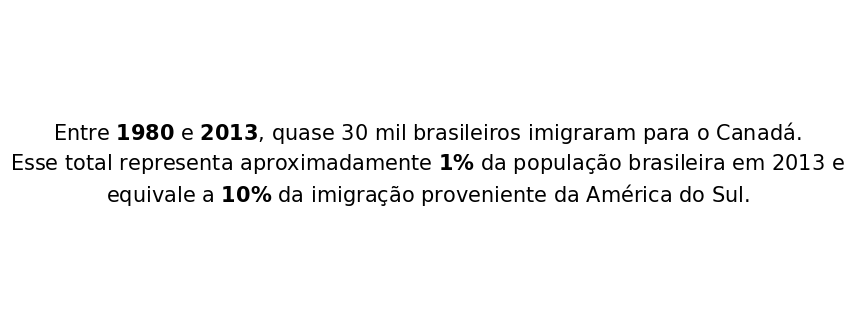

In [ ]:
#Informação:
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.text(0.5, 0.6, r'Entre $\bf{1980}$ e $\bf{2013}$, quase 30 mil brasileiros imigraram para o Canadá.',
        fontsize=15, ha='center', va='center')

ax.text(0.5, 0.5, r'Esse total representa aproximadamente $\bf{1\%}$ da população brasileira em 2013 e',
        fontsize=15, ha='center', va='center')

ax.text(0.5, 0.4, r'equivale a $\bf{10\%}$ da imigração proveniente da América do Sul.',
        fontsize=15, ha='center', va='center');

## Este gráfico representa a imigração de todos os países da América do Sul

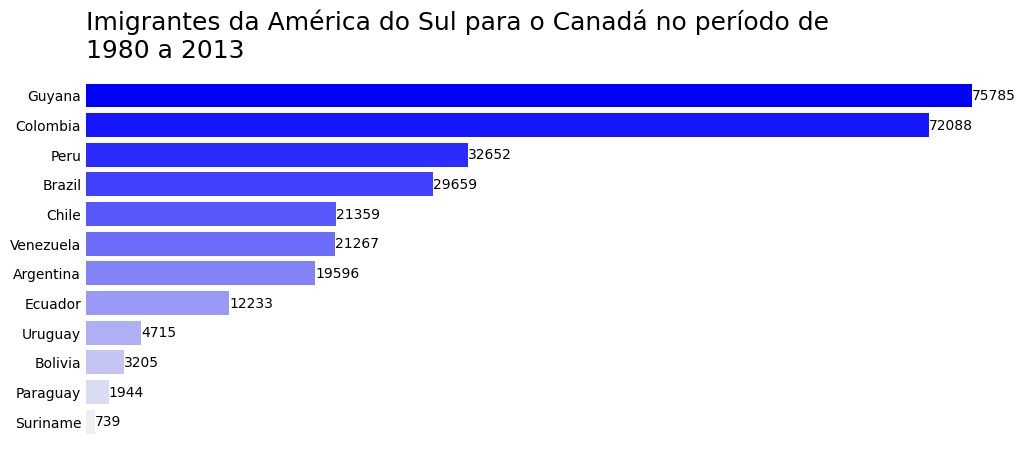

In [ ]:
#Visualização:
paleta = sns.light_palette("blue", n_colors=len(america_sul), as_cmap=False)

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul.index, america_sul['Total'], color= paleta)
ax.set_title('Imigrantes da América do Sul para o Canadá no período de\n1980 a 2013', fontsize= 18, loc= 'left')

ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_xticks([])

for spine in ax.spines.values():
    spine.set_visible(False)

for index, value in enumerate(america_sul['Total']):
    ax.text(value, index, str(value), va='center', c='black')


ax.tick_params(axis='both', which= 'both', length= 0)

plt.show()

## Imigração dos três países mais ricos da América do sul


O gráfico abaixo apresenta os três países mais ricos da América do Sul em termos de PIB que contribuem com o maior número de imigrantes da América do sul para o Canadá. Esses países, conhecidos por suas economias relativamente fortes na região, também refletem altos índices de mobilidade global.

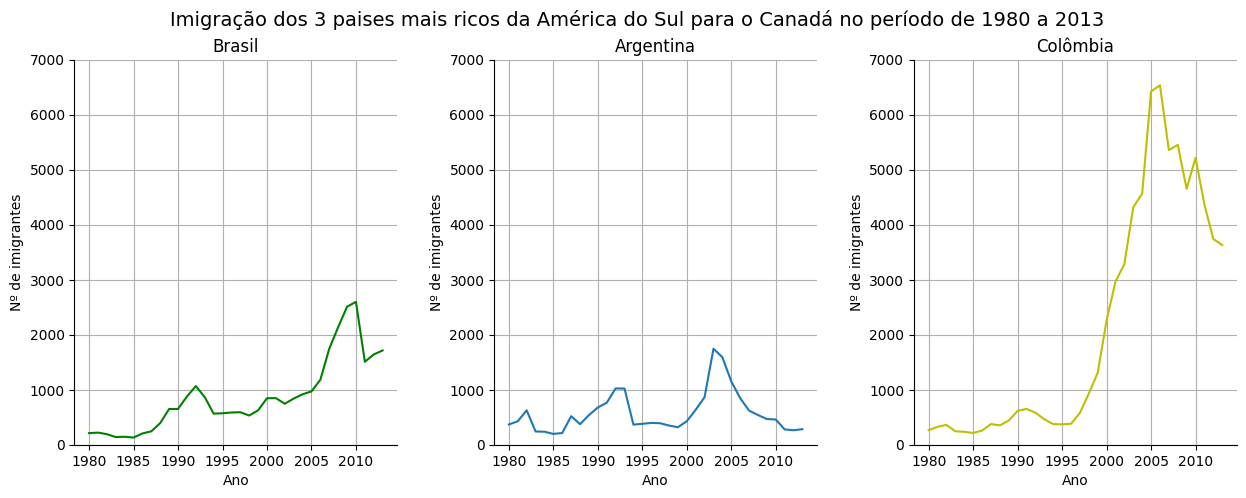

In [ ]:
#Visualização:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.6, wspace=0.3)
fig.suptitle('Imigração dos 3 paises mais ricos da América do Sul para o Canadá no período de 1980 a 2013\n', fontsize= '14')

axs[0].plot(df_imigracao_crted.loc['Brazil', anos], c='g')
axs[0].set_title('Brasil')

axs[1].plot(df_imigracao_crted.loc['Argentina', anos])
axs[1].set_title('Argentina')

axs[2].plot(df_imigracao_crted.loc['Colombia', anos], c='y')
axs[2].set_title('Colômbia')


for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.grid()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Nº de imigrantes')
    ax.set_ylim(0, 7000)

plt.show()

## Modelo de predição para imigração futura do Brasil para o Canadá com Scikitlearn



In [ ]:
dados_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ano         34 non-null     int64
 1   imigrantes  34 non-null     int64
dtypes: int64(2)
memory usage: 676.0 bytes


In [ ]:
x= dados_brasil[['ano']].values
y= dados_brasil['imigrantes'].values

In [ ]:
xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size= 0.20, random_state= 42)

In [ ]:
print(x.shape, y.shape)

(34, 1) (34,)


In [ ]:
modelo = LinearRegression()
modelo.fit(xtreino, ytreino)

LinearRegression()

In [ ]:
score = modelo.score(xteste, yteste)
print(f'R² (coeficiente de determinação): {score:.2f}')

R² (coeficiente de determinação): 0.44


In [ ]:
ypred = modelo.predict(xteste)

In [ ]:
mean = mean_absolute_error(yteste, ypred)
mse = mean_squared_error(yteste, ypred)

print(mean, mse)

285.9391131289282 98173.49207235352


## Modelo de predição para imigração futura do Brasil para o Canadá com ARIMA

In [ ]:
dados_brasil['ano'] = pd.to_datetime(dados_brasil['ano'], format='%Y')
dados_brasil.set_index('ano', inplace=True)

In [ ]:
model = ARIMA(dados_brasil['imigrantes'], order=(1, 1, 1))
model_fit = model.fit()

c:\Users\alleo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\alleo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\alleo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.forecast(steps=10)
forecast

2014-01-01    1491.365571
2015-01-01    1639.435143
2016-01-01    1540.957121
2017-01-01    1606.452825
2018-01-01    1562.892981
2019-01-01    1591.863736
2020-01-01    1572.595884
2021-01-01    1585.410535
2022-01-01    1576.887775
2023-01-01    1582.556087
Freq: YS-JAN, Name: predicted_mean, dtype: float64

## Visualizando previsões

C:\Users\alleo\AppData\Local\Temp\ipykernel_12600\4144990440.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(dados_brasil.index[-1], periods=10, freq='Y'), forecast, label='Previsão', color='red')


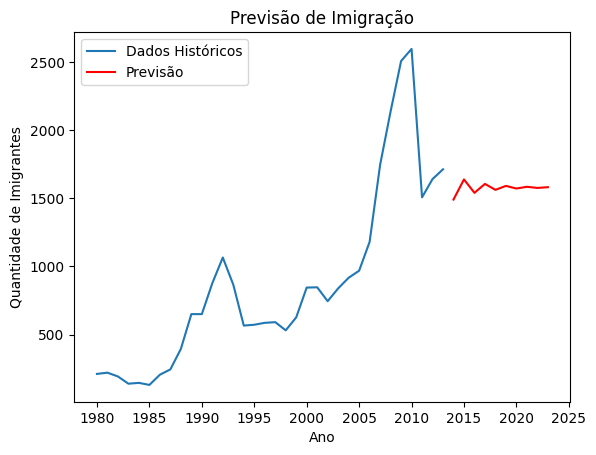

In [ ]:
#Visualização:
plt.plot(dados_brasil.index, dados_brasil['imigrantes'], label='Dados Históricos')
plt.plot(pd.date_range(dados_brasil.index[-1], periods=10, freq='Y'), forecast, label='Previsão', color='red')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Imigrantes')
plt.title('Previsão de Imigração')
plt.legend()
plt.show()


In [ ]:
mae = mean_absolute_error(dados_brasil['imigrantes'], model_fit.fittedvalues)
rmse = np.sqrt(mean_squared_error(dados_brasil['imigrantes'], model_fit.fittedvalues))
print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 159.81276095939975, RMSE: 245.77640791373437


In [ ]:
y_real = dados_brasil['imigrantes']
y_pred = model_fit.fittedvalues

In [ ]:
r2 = r2_score(y_real, y_pred)
print(f"Coeficiente de Determinação (R²): {r2}")

Coeficiente de Determinação (R²): 0.8585858672741388
